In [1]:
def shorten(x):
    x = str(x)
    if len(x)<6:
        for i in range(6-len(x)):
            x+='0'
        return(x)
    elif len(x)>6:
        return (x[:6])
    else:
        return(x)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
from io import StringIO
import io

%matplotlib inline

In [3]:
data = pd.read_excel('M&A_SDC.xlsx')

In [4]:
data.shape

(11977, 33)

In [5]:
data.head()

,Date Announced,Date Effective,Status,Target Name,Target Short Business Description,Target Primary SIC Code,Target Industry Sector,Target Nation,Acquiror Name,Acquiror Short Business Description,...,Target Share Price 1 Day Prior to Announcement ($),Target Closing Price At Ann Date ($),Target Closing Price 1 Day After Ann Date ($),Shares Out. Actual (mil),Ratio of Enterprise Value to EBIT,Acquiror Cash LTM ($ mil),Acquiror CUSIP,Target CUSIP,Target Primary Ticker Symbol,Acquiror Primary Ticker Symbol
0,1990-01-03,NaT,Withdrawn,"National Savings Bank,Albany",Savings bank,6035,"Savings and Loans, Mutual Savings Banks",United States,"TrustCo Bank Corp,NY",Bank holding company,...,28.000,30.000,28.75,1.16,104.309,NaN,898349,637455,NSBA,TRST
1,1990-01-03,NaT,Dis Rumor,Paramount Communications,"Entertainment,sports promotion",7822,Motion Picture Production and Distribution,United States,CBS Inc,"Own,op TV,radio stations",...,59.625,62.125,63.00,116.19,np,1077.8,124845,699216,PCI,CBS
2,1990-01-03,NaT,Withdrawn,Qume Corp,Mnfr computer peripheral equip,3577,Computer and Office Equipment,United States,Investor Group,Investor group,...,5.250,6.250,6.50,11.10,39.889,NaN,46145M,749060,QUME,NaN
3,1990-01-03,NaT,Intended,UAL Corp,Passenger airline,4512,Air Transportation and Shipping,United States,Investor Group,Investor group,...,164.500,210.750,219.25,NaN,np,NaN,46145M,902549,UAL,NaN
4,1990-01-08,NaT,Withdrawn,ALC Communications Corp,Long distance telecomm service,4813,Telecommunications,United States,Telecom USA Inc,Provide telemarketing services,...,1.563,2.438,2.00,13.70,np,NaN,87928C,001575,ALCC,TTT


In [6]:
data.columns =['Date Ann', 'Date Effective', 'Status', 'Target Name',
       'Target Description', 'Target Primary SIC Code',
       'Target Industry', 'Target Nation', 'Acquiror Name',
       'Acquiror Description', 'Acquiror Industry',
       'Acquiror Nation',
       'Acquiror Market Val 4 Weeks Prior',
       'Acquiror Closing Price Ann',
       'Acquiror Closing Price 1 Day After Ann', 'Synopsis',
       '% of Shares Acq.', 'Price Per Share',
       'Net Income LTM',
       'Target EBITDA LTM',
       'Target Book Value Per Share LTM',
       'Target Earnings Per Share LTM',
       'Target Share Price 1 Week Prior to Announcement',
       'Target Share Price 1 Day Prior to Announcement',
       'Target Closing Price At Ann Date',
       'Target Closing Price 1 Day After Ann Date',
       'Shares Out Actual', 'EV to EBIT',
       'Acquiror Cash LTM','Acquiror CUSIP', 'Target CUSIP','Target Ticker', 'Acquiror Ticker']

In [7]:
data['Date Ann'] = pd.to_datetime(data['Date Ann'])

In [8]:
#data.groupby('Acquiror Nation')['Target Nation'].count()
data.columns

Index(['Date Ann', 'Date Effective', 'Status', 'Target Name',
       'Target Description', 'Target Primary SIC Code', 'Target Industry',
       'Target Nation', 'Acquiror Name', 'Acquiror Description',
       'Acquiror Industry', 'Acquiror Nation',
       'Acquiror Market Val 4 Weeks Prior', 'Acquiror Closing Price Ann',
       'Acquiror Closing Price 1 Day After Ann', 'Synopsis',
       '% of Shares Acq.', 'Price Per Share', 'Net Income LTM',
       'Target EBITDA LTM', 'Target Book Value Per Share LTM',
       'Target Earnings Per Share LTM',
       'Target Share Price 1 Week Prior to Announcement',
       'Target Share Price 1 Day Prior to Announcement',
       'Target Closing Price At Ann Date',
       'Target Closing Price 1 Day After Ann Date', 'Shares Out Actual',
       'EV to EBIT', 'Acquiror Cash LTM', 'Acquiror CUSIP', 'Target CUSIP',
       'Target Ticker', 'Acquiror Ticker'],
      dtype='object')

In [9]:
temp_data = data[data['Price Per Share'].notnull()]
temp_data.groupby('Status')['Date Ann'].count()

Status
Completed         7432
Dis Rumor            1
Intended            28
Intent W            19
Part Comp            1
Pending            170
S Buyer W            1
Status Unknown      23
Withdrawn         1518
Name: Date Ann, dtype: int64

In [10]:
# For now, only consider the ones completed and withdrawn.
#new_data[new_data['Price Per Share'].isnull()]

In [11]:
#new_data = data[data['Status'].isin(['Completed','Withdrawn'])] 
new_data = data[data['Price Per Share'].notnull()]
new_data = new_data[new_data['Price Per Share']>1]
new_data = new_data[-new_data['Status'].isin(['Pending'])]
new_data['Status'] = data['Status'].apply(lambda x: x if x=='Completed' else 'Failed')

In [12]:
print (new_data.shape)
new_data.groupby('Status')['Date Ann'].count()

(8963, 33)


Status
Completed    7383
Failed       1580
Name: Date Ann, dtype: int64

In [13]:
temp = pd.read_csv('2003_vol.csv')
temp = temp.drop('index_flag',axis=1)
temp['date'] = pd.to_datetime(temp['date'],format='%Y%m%d')
temp_30 = temp[temp['days']==30]
new_temp = temp_30.pivot(index='date',columns='secid',values='volatility').pct_change(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_30 = pd.merge(temp_30, new_temp, on=['date','secid'],how='left')
temp_30.columns=['secid', 'date', 'days', 'volatility_30', 'ticker', 'vol_jump_30']
temp_14 = temp[temp['days']==14]
new_temp = temp_14.pivot(index='date',columns='secid',values='volatility').shift(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_14 = pd.merge(temp_14, new_temp, on=['date','secid'],how='left')
temp_14.columns=['secid', 'date', 'days', 'volatility_14', 'ticker', 'vol_jump_14']
temp = pd.merge(temp_30,temp_14,on=['date','secid'],how='outer')
temp = temp.drop(['days_x', 'days_y', 'ticker_y'],axis=1)
temp.columns = ['secid', 'date', 'volatility_30', 'ticker', 'vol_jump_30',
       'volatility_14', 'vol_jump_14']
temp['vol_30_shift'] = temp['volatility_30'].shift(-1)
temp['vol_jump_30_shift'] = temp['vol_jump_30'].shift(-1)
temp['vol_14_shift'] = temp['volatility_14'].shift(-1)
temp['vol_jump_14_shift'] = temp['vol_jump_14'].shift(-1)

In [14]:
vol=pd.DataFrame()
vol = pd.concat([vol,temp])

In [15]:
temp = pd.read_csv('2010_vol.csv')
temp = temp.drop('index_flag',axis=1)
temp['date'] = pd.to_datetime(temp['date'],format='%Y%m%d')
temp_30 = temp[temp['days']==30]
new_temp = temp_30.pivot(index='date',columns='secid',values='volatility').pct_change(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_30 = pd.merge(temp_30, new_temp, on=['date','secid'],how='left')
temp_30.columns=['secid', 'date', 'days', 'volatility_30', 'ticker', 'vol_jump_30']
temp_14 = temp[temp['days']==14]
new_temp = temp_14.pivot(index='date',columns='secid',values='volatility').shift(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_14 = pd.merge(temp_14, new_temp, on=['date','secid'],how='left')
temp_14.columns=['secid', 'date', 'days', 'volatility_14', 'ticker', 'vol_jump_14']
temp = pd.merge(temp_30,temp_14,on=['date','secid'],how='outer')
temp = temp.drop(['days_x', 'days_y', 'ticker_y'],axis=1)
temp.columns = ['secid', 'date', 'volatility_30', 'ticker', 'vol_jump_30',
       'volatility_14', 'vol_jump_14']
temp['vol_30_shift'] = temp['volatility_30'].shift(-1)
temp['vol_jump_30_shift'] = temp['vol_jump_30'].shift(-1)
temp['vol_14_shift'] = temp['volatility_14'].shift(-1)
temp['vol_jump_14_shift'] = temp['vol_jump_14'].shift(-1)
vol = pd.concat([vol,temp])

In [16]:
temp = pd.read_csv('2017_vol.csv')
temp = temp.drop('index_flag',axis=1)
temp['date'] = pd.to_datetime(temp['date'],format='%Y%m%d')
temp_30 = temp[temp['days']==30]
new_temp = temp_30.pivot(index='date',columns='secid',values='volatility').pct_change(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_30 = pd.merge(temp_30, new_temp, on=['date','secid'],how='left')
temp_30.columns=['secid', 'date', 'days', 'volatility_30', 'ticker', 'vol_jump_30']
temp_14 = temp[temp['days']==14]
new_temp = temp_14.pivot(index='date',columns='secid',values='volatility').shift(1).stack().reset_index()
new_temp.columns=['date','secid','vol_jump']
temp_14 = pd.merge(temp_14, new_temp, on=['date','secid'],how='left')
temp_14.columns=['secid', 'date', 'days', 'volatility_14', 'ticker', 'vol_jump_14']
temp = pd.merge(temp_30,temp_14,on=['date','secid'],how='outer')
temp = temp.drop(['days_x', 'days_y', 'ticker_y'],axis=1)
temp.columns = ['secid', 'date', 'volatility_30', 'ticker', 'vol_jump_30',
       'volatility_14', 'vol_jump_14']
temp['vol_30_shift'] = temp['volatility_30'].shift(-1)
temp['vol_jump_30_shift'] = temp['vol_jump_30'].shift(-1)
temp['vol_14_shift'] = temp['volatility_14'].shift(-1)
temp['vol_jump_14_shift'] = temp['vol_jump_14'].shift(-1)
vol = pd.concat([vol,temp])

In [17]:
vol = vol.reset_index(drop=True)

In [18]:
new_data = pd.merge(new_data, vol, left_on = ['Date Ann','Target Ticker'], right_on=['date','ticker'],how='left')
new_data = pd.merge(new_data, vol, left_on = ['Date Ann','Acquiror Ticker'], right_on=['date','ticker'],how='left')

In [19]:
new_data = new_data.drop(['secid_x', 'date_x', 
        'ticker_x', 'secid_y', 'date_y', 'ticker_y'],axis=1)
new_data.columns

Index(['Date Ann', 'Date Effective', 'Status', 'Target Name',
       'Target Description', 'Target Primary SIC Code', 'Target Industry',
       'Target Nation', 'Acquiror Name', 'Acquiror Description',
       'Acquiror Industry', 'Acquiror Nation',
       'Acquiror Market Val 4 Weeks Prior', 'Acquiror Closing Price Ann',
       'Acquiror Closing Price 1 Day After Ann', 'Synopsis',
       '% of Shares Acq.', 'Price Per Share', 'Net Income LTM',
       'Target EBITDA LTM', 'Target Book Value Per Share LTM',
       'Target Earnings Per Share LTM',
       'Target Share Price 1 Week Prior to Announcement',
       'Target Share Price 1 Day Prior to Announcement',
       'Target Closing Price At Ann Date',
       'Target Closing Price 1 Day After Ann Date', 'Shares Out Actual',
       'EV to EBIT', 'Acquiror Cash LTM', 'Acquiror CUSIP', 'Target CUSIP',
       'Target Ticker', 'Acquiror Ticker', 'volatility_30_x', 'vol_jump_30_x',
       'volatility_14_x', 'vol_jump_14_x', 'vol_30_shift_x',
  

In [20]:
new_data.columns=['Date Ann', 'Date Effective', 'Status', 'Target Name',
       'Target Description', 'Target Primary SIC Code', 'Target Industry',
       'Target Nation', 'Acquiror Name', 'Acquiror Description',
       'Acquiror Industry', 'Acquiror Nation',
       'Acquiror Market Val 4 Weeks Prior', 'Acquiror Closing Price Ann',
       'Acquiror Closing Price 1 Day After Ann', 'Synopsis',
       '% of Shares Acq.', 'Price Per Share', 'Net Income LTM',
       'Target EBITDA LTM', 'Target Book Value Per Share LTM',
       'Target Earnings Per Share LTM',
       'Target Share Price 1 Week Prior to Announcement',
       'Target Share Price 1 Day Prior to Announcement',
       'Target Closing Price At Ann Date',
       'Target Closing Price 1 Day After Ann Date', 'Shares Out Actual',
       'EV to EBIT', 'Acquiror Cash LTM', 'Acquiror CUSIP', 'Target CUSIP',
       'Target Ticker', 'Acquiror Ticker', 'Target Volatility 30', 'Target Vol jump 30', 'Target Volatility 14',
       'Target Vol jump 14', 'Target Volatility 30 Shift',
       'Target Vol jump 30 Shift', 'Target Volatility 14 Shift', 'Target Vol jump 14 Shift',
                  'Acquiror Volatility 30', 
       'Acquiror Vol jump 30', 'Acquiror Volatility 14', 'Acquiror Vol jump 14','Acquiror Volatility 30 Shift',
       'Acquiror Vol jump 30 Shift', 'Acquiror Volatility 14 Shift', 'Acquiror Vol jump 14 Shift',]

In [21]:
new_data.head()

,Date Ann,Date Effective,Status,Target Name,Target Description,Target Primary SIC Code,Target Industry,Target Nation,Acquiror Name,Acquiror Description,...,Target Volatility 14 Shift,Target Vol jump 14 Shift,Acquiror Volatility 30,Acquiror Vol jump 30,Acquiror Volatility 14,Acquiror Vol jump 14,Acquiror Volatility 30 Shift,Acquiror Vol jump 30 Shift,Acquiror Volatility 14 Shift,Acquiror Vol jump 14 Shift
0,1990-01-03,NaT,Failed,"National Savings Bank,Albany",Savings bank,6035,"Savings and Loans, Mutual Savings Banks",United States,"TrustCo Bank Corp,NY",Bank holding company,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,NaT,Failed,Qume Corp,Mnfr computer peripheral equip,3577,Computer and Office Equipment,United States,Investor Group,Investor group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-08,NaT,Failed,"First Fidelity Bancorp,NJ",Bank holding company,6021,"Commercial Banks, Bank Holding Companies",United States,"PNC Financial,Pittsburgh,PA","Commercial,investment bank",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-08,NaT,Failed,Royal International Optical,"Own,operate optical stores",5995,Miscellaneous Retail Trade,United States,IPCO Corp,Whl medical and optical prod,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-12,NaT,Failed,"BFS Bankorp Inc,New York,NY",Bank holding company,6036,"Savings and Loans, Mutual Savings Banks",United States,First Capital Group Inc,Investment firm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
temp = new_data.groupby('Acquiror Name')['Date Ann'].count().reset_index()

# It is very unlikedly that one company bought more then 30 public companies. Looking at the data, some Acquirors
# are "Investors" or "Creditors". This should be taken into account when using Acquiror Name as dependent
# One potential alternative is to label Acquiror's into different categories. ie: frequent buyers, first time buyer,
# Investor, creditor, insider etc.
temp[temp['Date Ann'] >= 20]

,Acquiror Name,Date Ann
488,BB&T Corp,24
1389,Danaher Corp,20
1892,"First Union Corp,Charlotte,NC",21
2613,Investor,26
2614,Investor Group,453
2711,Johnson & Johnson,23
3612,Oracle Corp,23
4338,Shareholders,43


In [23]:
new_data.groupby('Target Industry')['Date Ann'].count().reset_index().sort_values(by='Date Ann', ascending = False)
# Commercial Banks are most likely the target, while public administration and legal service are least likely

,Target Industry,Date Ann
7,"Commercial Banks, Bank Holding Companies",1118
5,Business Services,777
47,"Savings and Loans, Mutual Savings Banks",527
35,Prepackaged Software,511
25,"Measuring, Medical, Photo Equipment; Clocks",470
21,"Investment & Commodity Firms,Dealers,Exchanges",440
15,Electronic and Electrical Equipment,367
12,Drugs,358
31,Oil and Gas; Petroleum Refining,288
20,Insurance,281


In [24]:
def true_false(x):
    if x == True:
        return (1)
    elif x == False:
        return (-1)
    else:
        return x
def to_num(x):
    if x == 'Completed':
        return (1)
    else:
        return (-1)
    
def to_num_0(x):
    if x == 'Completed':
        return (1)
    else:
        return (0)
    
def clean_data(x):
    if isinstance(x, float) == True:
        return (x)
    elif isinstance(x, int) == True:
        return (x)
    else:
        return (np.nan)
    
def find_ff_ind(x):
    try: x = int(x)
    except: return (30)
    a = sic[(sic['sic1']<= x)& (sic['sic2']>=x)]['ff30']
    try: 
        a = int(a)
    except: 
        #print (a)
        return (30)
    return (a)

In [25]:
# Valuation Ratios
new_data['cap'] = new_data['Price Per Share'] * new_data['Shares Out Actual']
new_data['cap_diff'] = new_data['Acquiror Market Val 4 Weeks Prior'] - new_data['cap']
new_data['Offer EP'] =  new_data['Target Earnings Per Share LTM'] / new_data['Price Per Share'] 
new_data['Past EP'] =  new_data['Target Earnings Per Share LTM']/new_data['Target Share Price 1 Day Prior to Announcement'] 

new_data['Offer BP'] = new_data['Target Book Value Per Share LTM'] / new_data['Price Per Share']
new_data['Past BP'] =  new_data['Target Book Value Per Share LTM'] / new_data['Target Share Price 1 Day Prior to Announcement'] 

new_data['Offer/Current Price Diff'] = (new_data['Target Closing Price 1 Day After Ann Date'] / new_data['Price Per Share'])-0.999
new_data.loc[:,'price premium'] = (new_data['Price Per Share'] / new_data['Target Share Price 1 Day Prior to Announcement'])-0.999
new_data['price jump'] = (new_data['Target Closing Price 1 Day After Ann Date'] / new_data['Target Share Price 1 Day Prior to Announcement'])-0.999

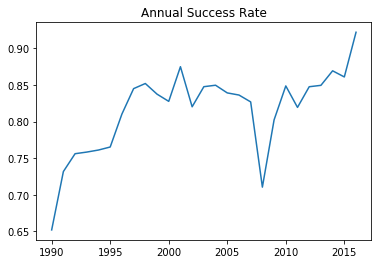

In [26]:
new_data['year'] = new_data['Date Ann'].dt.year

new_data['rolling_price_premium'] = new_data['price premium'].rolling(250).mean()
new_data['price_premium_diff'] = new_data['price premium'] - new_data['rolling_price_premium']
new_data = new_data.applymap(true_false)
new_data['new_Status'] = new_data['Status'].apply(to_num_0)

year = new_data.groupby('year')
plt.plot(year['new_Status'].sum() / year['new_Status'].count())
plt.title('Annual Success Rate')

new_data = new_data.drop('year',axis=1)

new_data['rolling_mean_long'] = new_data['new_Status'].rolling(250).mean().shift(1)
new_data['rolling_mean_medium'] = new_data['new_Status'].rolling(100).mean().shift(1)
new_data['rolling_mean_short'] = new_data['new_Status'].rolling(30).mean().shift(1)

new_data = new_data.drop('new_Status',axis=1)

# Many NaNs

In [27]:
# Time region characteristic

president = {1990: 'R',1991:'R',1992:'R',1993:'D',1994:'D',1995:'D',1996:'D',1997:'D',1998:'D',1999:'D',2000:'D',
              2001:'R',2002:'R',2003:'R',2004:'R',2005:'R',2006:'R',2007:'R',2008:'R',2009:'D',2010:'D',2011:'D',
              2012:'D',2013:'D',2014:'D',2015:'D',2016:'D',2017:'R'}
new_data['president'] = new_data['Date Ann'].dt.year.apply(lambda x: president[x])
new_data['Democrat'] = new_data['president'].apply(lambda x: 1 if x == 'D' else -1)
new_data = new_data.drop('president',axis=1)

In [28]:
# Deal characteristics
temp = new_data.groupby('Acquiror Name')['Date Ann'].count().reset_index()
temp['First Time'] = (temp['Date Ann'] == 1)
temp['Experienced'] = (temp['Date Ann'].between(2,10))
temp['Frequent'] = (temp['Date Ann'].between(11,25))
acq_name = list(temp[temp['Date Ann'] > 25]['Acquiror Name'])
for acq in acq_name:
    temp.loc[:, acq] = temp['Acquiror Name'].apply(lambda x: 1 if x == acq else -1)
temp = temp.drop('Date Ann', axis=1)

new_data = new_data.merge(temp, how = 'left',on='Acquiror Name')

new_data.loc[:,'nation diff'] = (new_data['Target Nation'] == new_data['Acquiror Nation'])

# This needs to be changed to fama industry classification
new_data.loc[:,'industry diff'] = (new_data['Target Industry'] == new_data['Acquiror Industry'])

sic = pd.read_csv('Siccodes30.csv')
new_data['fama_ind'] = new_data['Target Primary SIC Code'].apply(lambda x: find_ff_ind(x))

new_data.groupby('fama_ind')['fama_ind'].count()

ind_list = list(set(new_data['fama_ind']))

for industry in ind_list:
    new_data.loc[:, industry] = new_data['fama_ind'].apply(lambda x: 1 if int(x) == int(industry) else -1)
#nation_list = list(set(new_data['Acquiror Nation']))
#for nation in nation_list:
#    new_data.loc[:, nation] = new_data['Acquiror Nation'].apply(lambda x: 1 if x == nation else 0)
new_data['year'] = new_data['Date Ann'].dt.year


In [29]:
new_data = new_data.applymap(true_false)
new_data['new_Status'] = new_data['Status'].apply(to_num)

In [30]:
new_data.to_csv('final_data.csv')

In [ ]:
#new_data[new_data[1]==1]
#new_data['Acquiror Primary SIC Code']

In [ ]:
# % of share is based on sucess/failure
#new_data['% share'] = new_data['% of Shares Acq.']
#new_data['total cost'] = new_data['% of Shares Acq.'] * new_data['Price Per Share'] * new_data['Shares Out Actual']

In [34]:
new_data = pd.read_csv('final_data.csv',parse_dates=[1]).iloc[:,1:]

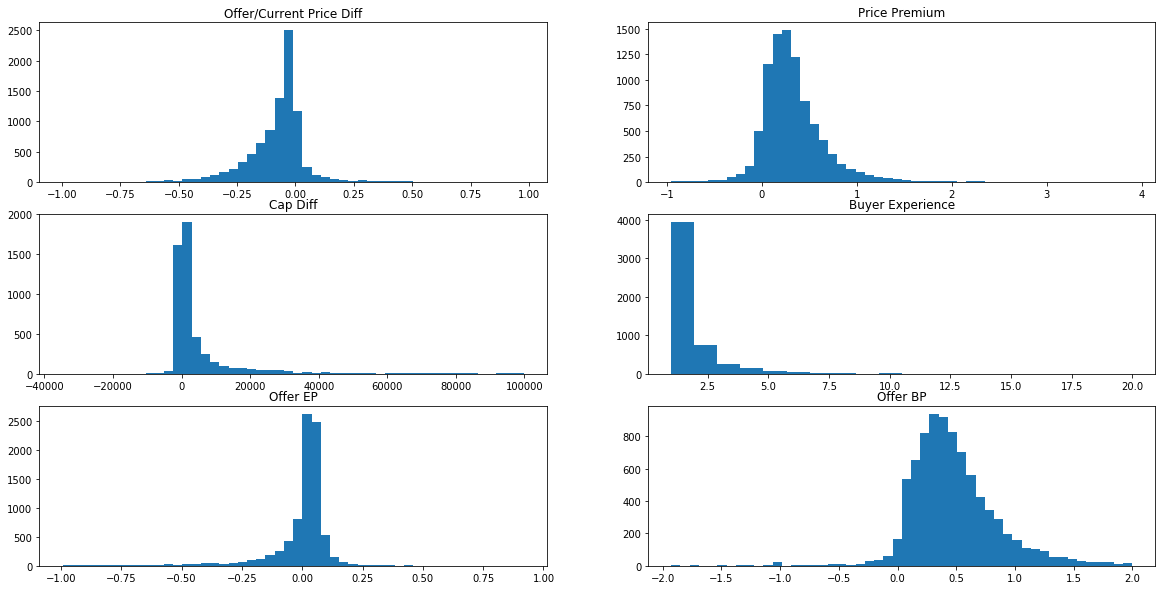

In [91]:
plt.figure(figsize=(20,10))
plt.subplot(321)
plt.hist(new_data[new_data['Offer/Current Price Diff']<1]['Offer/Current Price Diff'], bins=50)
plt.title('Offer/Current Price Diff')

plt.subplot(322)
plt.hist(new_data[new_data['price premium']<4]['price premium'], bins = 50)
plt.title('Price Premium')


plt.subplot(323)
plt.hist(new_data[new_data['cap_diff']<100000]['cap_diff'], bins = 50)
plt.title('Cap Diff')

temp = new_data.groupby('Acquiror Name')['Date Ann'].count().reset_index()
plt.subplot(324)
plt.hist(temp[temp['Date Ann']<=20]['Date Ann'], bins = 20)
plt.title('Buyer Experience')

plt.subplot(325)
plt.hist(new_data[new_data['Offer EP'].between(-1,1)]['Offer EP'], bins = 50)
plt.title('Offer EP')

plt.subplot(326)
plt.hist(new_data[new_data['Offer BP'].between(-2,2)]['Offer BP'], bins = 50)
plt.title('Offer BP')

plt.show()

In [ ]:
sum(new_data['% of Shares Acq.'].isnull())

In [113]:
# Split Train, Val, Test data

test_data = new_data[new_data['Date Ann']> '2008']
#val_data = new_data[(new_data['Date Ann'].between('2013','2015'))]
train_data = new_data[new_data['Date Ann']< '2008']

train_data = train_data.iloc[:,27:].applymap(clean_data)#.fillna(0)
train_data = train_data.drop(['Target Ticker','Acquiror Ticker'],axis=1)
train_data = train_data.drop(['Target CUSIP','Acquiror CUSIP'],axis=1)


test_data = test_data.iloc[:,27:].applymap(clean_data)#.fillna(0)
test_data = test_data.drop(['Target Ticker','Acquiror Ticker'],axis=1)
test_data = test_data.drop(['Target CUSIP','Acquiror CUSIP'],axis=1)

print (test_data.shape)
#print (val_data.shape)
print (train_data.shape)

(2057, 74)
(6981, 74)


In [ ]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [ ]:
new_train_data = pd.read_csv('new_train_data.csv')
new_train_data.columns = columns[0:27]
train_data = pd.concat([new_train_data,train_data.iloc[:,27:].reset_index(drop=True)],axis=1)

new_test_data = pd.read_csv('new_test_data.csv')
new_test_data.columns = columns[0:27]
test_data = pd.concat([new_test_data,test_data.iloc[:,27:].reset_index(drop=True)],axis=1)

In [114]:
print (test_data.shape)
print (train_data.shape)

y = train_data['new_Status']
x = train_data.drop('new_Status',axis=1)
# For some rolling variables
x = x.fillna(0)

columns=x.columns
x_new = test_data.drop('new_Status',axis=1)

x_new = x_new.fillna(0)

(2057, 74)
(6981, 74)


In [ ]:
test_data

In [ ]:
from sklearn.model_selection import train_test_split
model_data = new_data.iloc[:,27:].applymap(clean_data)#.fillna(0)
model_data = model_data.drop(['Target Ticker','Acquiror Ticker'],axis=1)
model_data = model_data.drop(['Target CUSIP','Acquiror CUSIP'],axis=1)

train_data, test_data = train_test_split(model_data, test_size=0.2, random_state=0)

y = train_data['new_Status']
x = train_data.drop('new_Status',axis=1)
columns=x.columns
x_new = test_data.drop('new_Status',axis=1)

In [62]:
from sklearn import preprocessing

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
#columns=x.columns
x = imp.fit_transform(x)
#x_scaled = preprocessing.scale(x)
x_new= imp.transform(x_new)
#x_new_scaled = preprocessing.scale(x_new)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=15)
pca.fit(x)
x = pca.transform(x)
x_new = pca.transform(x_new)

In [ ]:
pca.explained_variance_

In [ ]:
#train_data = train_data[train_data['price premium'] != np.nan]
#train_data = train_data[train_data['price premium'] != np.nan]

In [94]:
from sklearn import linear_model
log = linear_model.LogisticRegression('l1',C=0.01,tol=5.5 ,class_weight= None)

log.fit(x, y)

y_pred = log.predict(x_new)
y_new = test_data['new_Status']

score = log.score(x, y)
print (score)

score = log.score(x_new, y_new)
print (score)

0.768830417811
0.751831949194


In [117]:
coefs = log.coef_[0]
count=0
for i in range(len(coefs)):
    if coefs[i]!=0:
        print (str(columns[i]) +': '+ str(coefs[i]))
    count+=1

EV to EBIT: -5.4536514307e-05
Acquiror Cash LTM: 1.47885616748e-05
cap: 1.57006837714e-06
cap_diff: 2.69486543768e-06
Offer EP: 0.000589188782392
Offer BP: 1.87907017981e-06
Past BP: 6.26154450887e-07
First Time: -0.0332675193914
Experienced: 0.048624734511
Frequent: 0.0242889842438
Investor: -0.0849301529333
nation diff: 0.118327827358
industry diff: -0.003809584803
7: -1.00939713749
9: 0.0015270446683
23: -0.416548902434
24: -0.0375855938523
30: -2.01838448637e-05


In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, max_depth=20 ,max_features='auto' ,
                             random_state=0, criterion='entropy', min_samples_split=4 ,class_weight=None)

clf.fit(x, y)

y_pred = clf.predict(x_new)
y_new = test_data['new_Status']

score = clf.score(x, y)
print (score)

score = clf.score(x_new, y_new)
print (score)

print ((y_pred==1).sum()/len(y_pred))

0.974358974359
0.837627613029
0.983957219251


In [116]:
print ((y_new==1).sum() / len(y_new))
print ((y_pred==1).sum()/len(y_pred))

0.836169178415
0.983957219251


Feature ranking:
feature Offer/Current Price Diff 0.0788401717971
feature cap_diff 0.062804281795
feature Offer BP 0.0554462985538
feature Past BP 0.0544859157659
feature cap 0.0476238729208
feature price jump 0.0469716750388
feature Offer EP 0.0456862251303
feature Past EP 0.0448397303905
feature price_premium_diff 0.0438113308931
feature price premium 0.0426225751775
feature rolling_price_premium 0.0412696568736
feature EV to EBIT 0.0390566184742
feature Acquiror Cash LTM 0.0385345839146
feature rolling_mean_long 0.0347962962681
feature rolling_mean_medium 0.0322830032978
feature year 0.027815273704
feature rolling_mean_short 0.0274699588024
feature fama_ind 0.0251474597653
feature Investor Group 0.0121246613806
feature industry diff 0.00955223823903
feature Target Vol jump 30 Shift 0.00860178871006
feature 29 0.00831103014696
feature Acquiror Vol jump 30 0.00809514783543
feature Acquiror Vol jump 30 Shift 0.00760898579478
feature Experienced 0.00749292756961
feature Target Vol jump 

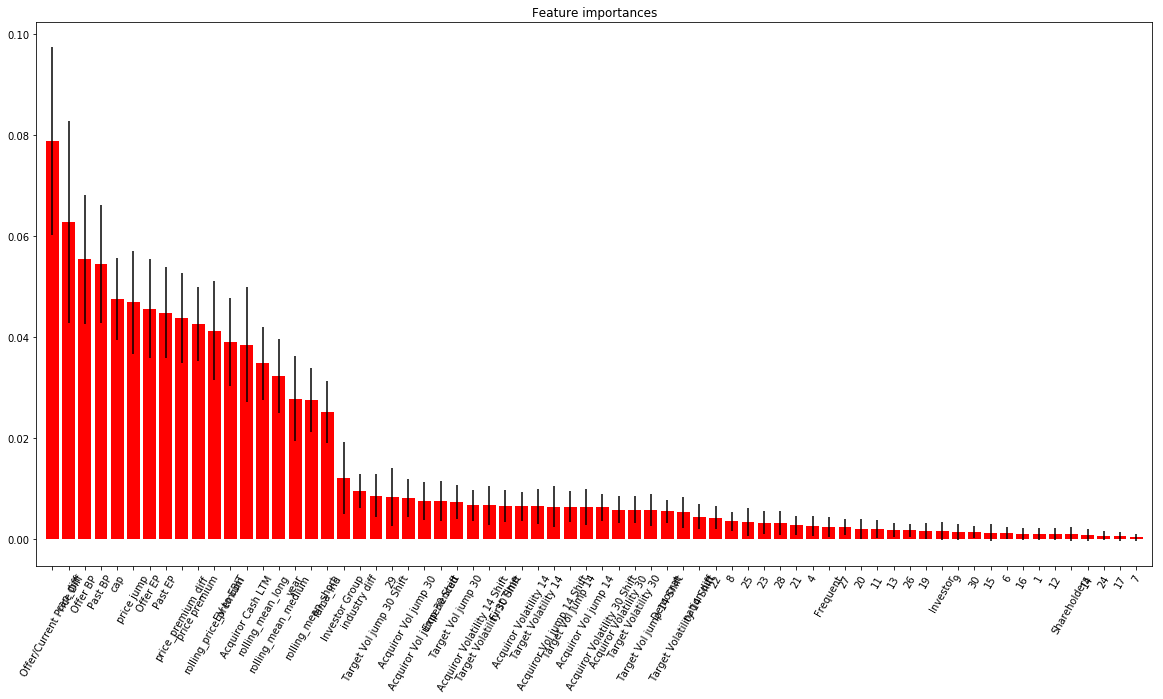

In [119]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

count = 0
for f in range(x.shape[1]):
    count +=1
    print("feature" , columns[int(indices[f])] , importances[indices[f]])
    if importances[indices[f]]<0.0005:
        break

#count = 20
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(count), importances[indices[:count]],
       color="r", yerr=std[indices[:count]], align="center")
plt.xticks(range(count), columns[indices],rotation=60)
plt.xlim([-1, count])
plt.show()

In [40]:
from sklearn import tree
from sklearn import metrics

model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [41]:
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
metrics.accuracy_score(y, model.predict(x))

0.82237501790574419

In [42]:
prediction = model.predict(x_new)
metrics.accuracy_score(y_new, prediction)

0.83082158483227997

In [45]:
import pydot_ng
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=x.columns.values)
pydot_ng.graph_from_dot_data(dot_data.getvalue()).write_png('tree.png')

True

In [ ]:
#x[x['Shareholders']==1]

In [50]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
neigh = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')
neigh.fit(x, y)

y_pred = neigh.predict(x_new)
y_new = test_data['new_Status']

score = neigh.score(x, y)
print (score)
score = neigh.score(x_new, y_new)
print (score)

0.822948001719
0.829363150219


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=150)
ada.fit(x, y)

y_pred = ada.predict(x_new)
y_new = test_data['new_Status']

score = ada.score(x, y)
print (score)
score = ada.score(x_new, y_new)
print (score)

0.835840137516
0.824501701507


In [52]:
from sklearn import svm
svm = svm.NuSVC(nu=0.05)#, class_weight='balanced')

svm.fit(x, y)

y_pred = svm.predict(x_new)
y_new = test_data['new_Status']

score = svm.score(x_new, y_new)
score

0.82887700534759357

In [53]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic',
                 hidden_layer_sizes=(100,), random_state=1 ,early_stopping=True) 
neural.fit(x, y)

score = neural.score(x, y)
print (score)

score = neural.score(x_new, y_new)
print (score)

0.81908036098
0.836169178415


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

parameters = {'max_features':('auto','log2'), 'max_depth':list(range(10,25)), 'class_weight':(None,'balanced'),
             'criterion': ('gini','entropy'), 'min_samples_split':(2,8,0.01)}

rdm = RandomForestClassifier(n_estimators=30)
clf = GridSearchCV(rdm, parameters)


clf.fit(x, y)

y_pred = clf.predict(x_new)
y_new = test_data['new_Status']

score = clf.score(x_new, y_new)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_score_

In [ ]:
x.shape

In [ ]:
import pandas as pd
 
# laod the Fama-French 30 industry classification txt
with open('Siccodes30.txt') as f:
    content = f.readlines()
# remove whitespace characters like `\n` at the end of each line
ff30 = [x.strip() for x in content] 
 
classification = []
sic1 = []
sic2 = []
for l in ff30:
    # if list in empty - skip
    if not l:
        continue
    # if not empty, break line by space
    l = l.split()
    if 1<= len(l[0]) <= 2:
        class_ = l[0]  # assign the ff49 industry classification
        continue
    if '-' in l[0]:
        classification.append(class_)  # append lass classfication
        sic1.append(l[0][:4])
        sic2.append(l[0][5:])
 
df = pd.DataFrame(data={'ff30': classification,
                        'sic1': sic1,
                        'sic2': sic2})
 
# export the dataframe to csv
df.to_csv('Siccodes30.csv', index=0)

In [ ]:
permno = pd.read_csv('PERMNO.csv')
permno = permno.drop('DATE',axis=1)
new_data['Acquiror CUSIP'] = new_data['Acquiror CUSIP'].apply(shorten)
new_data['Target CUSIP'] = new_data['Target CUSIP'].apply(shorten)
permno = permno.applymap(str)
permno['short_NCUSIP'] = permno['NCUSIP'].apply(shorten)
permno = permno.drop('COMNAM',axis=1)
new_data = pd.merge(new_data,permno,left_on='Target CUSIP',right_on='short_NCUSIP',how='left')
new_data = pd.merge(new_data,permno,left_on='Acquiror CUSIP',right_on='short_NCUSIP',how='left')

temp = new_data[(new_data['Date Ann']>= '2010')&(new_data['Date Ann']< '2017')][['Target Ticker','Acquiror Ticker']]
file = open('cusip_2017.txt','w') 
cusip = set(temp['Target Ticker'])|set(temp['Acquiror Ticker'])
for name in cusip:
    file.write(str(name)+'\n')

file.close()